## Task4: Churn Prediction Model

In [2]:
# Data handling
import pandas as pd

# machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### These libraries help us split data,train the model and evaluate performance

In [3]:
df=pd.read_csv("cleaned_customer_churn.csv")

In [4]:
df.shape

(7043, 31)

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
bool_cols=df.select_dtypes(include='bool').columns
df[bool_cols]=df[bool_cols].astype(int)

In [8]:
df.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int32
Partner_Yes                                int32
Dependents_Yes                             int32
PhoneService_Yes                           int32
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No internet service            int32
TechSupport_Yes                            int32
StreamingTV_No inter

In [9]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


#### Define feature(x) and Target(y)

In [10]:
x=df.drop('Churn_Yes',axis=1) #features
y=df['Churn_Yes']  #target variable

#### All relevant customer attributes were selected as features,while the churn indicator was chosen as the target variale 

In [11]:
x.shape,y.shape

((7032, 30), (7032,))

In [12]:
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
# Split data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#### The dataset split into training and testing sets to evaluate model performance on unseen data

#### 80% data -> train model
#### 20% data -> test model
#### random_state ensures consistent result

In [14]:
print(x_train.shape)
print(y_train.shape)

(5625, 30)
(5625,)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Feature scaling was applied to normalize numerical values and improves the convergence and performance of the model 

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

#### A logistic regression model was trained to classify customers as churn or non-churn ased on input features

In [18]:
# After train the model,predict on test data
y_pred=model.predict(x_test)

In [19]:
accuracy= accuracy_score(y_test,y_pred)
print('Model accuracy:', accuracy)

Model accuracy: 0.7874911158493249


#### Out of 100 customers,model predict about 79 customers

In [20]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### The model evaluating using accuracy, precision ,recall,F1-score and confusion matrix to assess predictive performance

In [22]:
y.value_counts(normalize=True)

Churn_Yes
0    0.734215
1    0.265785
Name: proportion, dtype: float64

#### The dataset is slightly imbalanced,with fewer churn cases than non-churn.This impacts the model's ability to detect churn customers effectively

In [21]:
# Confusion matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[915 118]
 [181 193]]


#### 915 customers predict as NOT churning
#### 193 customers identified as churn-risk
#### 181 churn customers were missed
#### 118 customers were falsely predict as churn

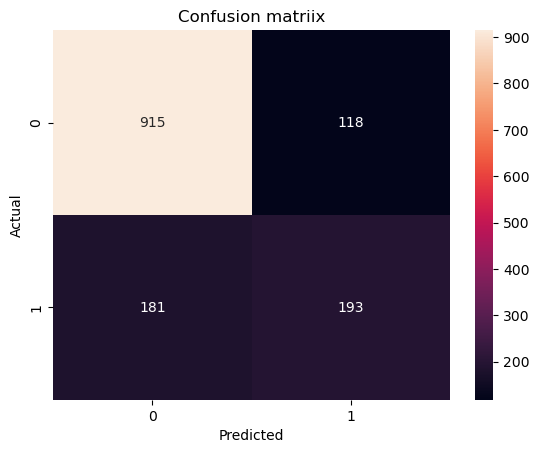

In [23]:
cm= confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matriix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Final Model conclusion 
#### A logistic regression model was developed to predict customers churn with an accuracy of approximate 79%. The model demonstrates strong capability in identifying non-curn customers and moderate efectiveness in detecting churn cases. These prediction can hlp organizations proactively engage at risk customers and reduse revenue loss